Since Logistic Regression only requires classes to be nearly linearly separable, I will use Logistic Regression to represent binary classifiers. Note that there are many more algorithms for binary classification that I have not introduced. The techniques in this article can be applied to any binary classifiers.

Besides all the linearly separable with only two classes, I will also introduce the concept of multi-class classification. In multi-class classification, the classes are linearly separable (or nearly).

There are at least four ways to apply binary classifiers to multi-class classification problems:

# One-vs-one

Build a lot of binary classifiers for each pair of classes. The first classifier distinguishes between class 1 and class 2, the second classifier distinguishes between class 1 and class 3, etc. When a new data point is input, it is passed through all the binary classifiers above. The final result can be determined by seeing which class the data point is most often classified into (major voting). Or with Logistic Regression, we can sum the probabilities found after each binary classifier.

Then, if we have $C$ classes, then the number of binary classifiers we need to build is $\frac{C(C-1)}{2}$. This is a big number when $C$ is large, not good for performance. Furthermore, if a new number is 1 (Assume we try to classify the number image), but it got misclassified as 5 and 6, then the probability to find 5 or 6 is higher than 1.

# Hierarchical classification

Doing **one-vs-one** would take a lot of training time because there are too many classifiers to build. Another way to save more binary classifiers is **hierarchical**. The idea is as follows:

Example with MNIST dataset with 4 number 4, 5, 6, 7. We can see that 4 and 7 are similar, 5 and 6 are similar. So we can build a binary classifier to distinguish between 4 and 7, and another binary classifier to distinguish between 5 and 6. Then, we can build a binary classifier to distinguish between 4 and 7, and 5 and 6. This way, we only need 3 binary classifiers.

The advantage of this method is that it uses fewer binary classifiers than **one-vs-one**. Its biggest drawback is that if even one binary classifier gives an incorrect result, the final result will definitely be wrong. For example, if an image contains the number 5, but in the first step it is misclassified to the [4, 7] branch, the final result will be either 4 or 7, both of which are incorrect.

# Binary coding

One way to further reduce the number of binary classifiers is to **binary code**, which encodes the output of each class as a binary number. For example, if there are 4 classes, the first class is encoded as 00, the other three classes are encoded as 01, 10, and 11, respectively. With this approach, the number of binary classifiers to be implemented is only $m = \lceil{\log_2 (C)}\rceil$ where $C$ is the number of classes, $\lceil{a}\rceil$ is the smallest integer greater than or equal to $a$.

First class will starting to find the first bit, the second class will find the second bit, etc. The final result is the binary number that has the highest probability.

This approach uses the smallest number of binary classifiers. But it has a major limitation that even a single misclassified bit will result in misclassified data. Furthermore, if the number of classes is not a power of two, the resulting binary code may be a value that does not correspond to any class!

# One-vs-rest (One-vs-all)

The most commonly used method is **one-vs-rest** (some literature calls it **ove-vs-all**, **one-against-rest**, or **one-against-all**). Specifically, if there is $C$ classes then we will build $C$ binary classifiers. Each classifier represents one class and the rest of the classes.

Example, Classifier one will distinguish between class 1 and not class 1, thus consider if a point is in class 1 or not, or the probability of being in class 1. Classifier two will distinguish between class 2 and not class 2, etc. Final results can be identify by the class that has the highest probability.

This method is also called one-hot coding (it is used a lot so it has many names) because with the above encoding method, suppose there are 4 classes, class 1, 2, 3, 4 will be encoded in binary form by 1000, 0100, 0010 or 0001 respectively. One-hot because only one bit is hot (equal to 1).

# Conclusion

Although it can work for any classifier, but it's depend on the dataset to choose the best method. Consider the example below:

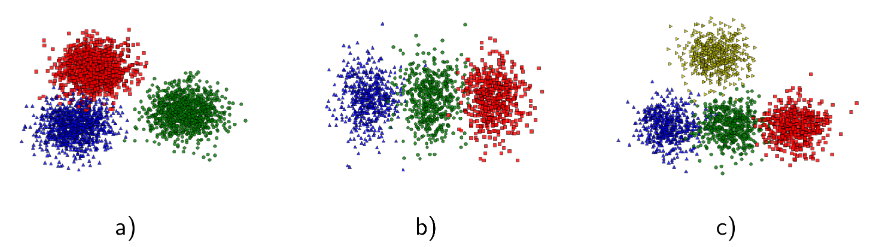

- With dataset $a)$, all methods can work well.

- With dataset $b)$, **one-vs-rest** is not suitable because the green class and the rest (composite of blue and red) are not linearly separable. In this case, one-vs-one or hierarchical is more suitable.

- With dataset $c)$, same as $b)$, **one-vs-rest** is not suitable. But **one-vs-one** still works because each pair of classes is linearly separable. Similarly **hierarchical** also works if we divide the groups appropriately. Or we can ***combine multiple*** methods. For example, use **one-vs-rest** to find red vs. non-red. If one data point is non-red, with the remaining 3 classes, we are back to the case of Figure $4a)$ and can use other methods.

### Neural Network

For example, with a problem with 4 classes 1, 2, 3, 4; we can represent the models mentioned in section 3 in the following form (assuming the input has 7 dimensions and the red output node represents the common representation for PLA, Logistic Regression and networks with other activation functions):

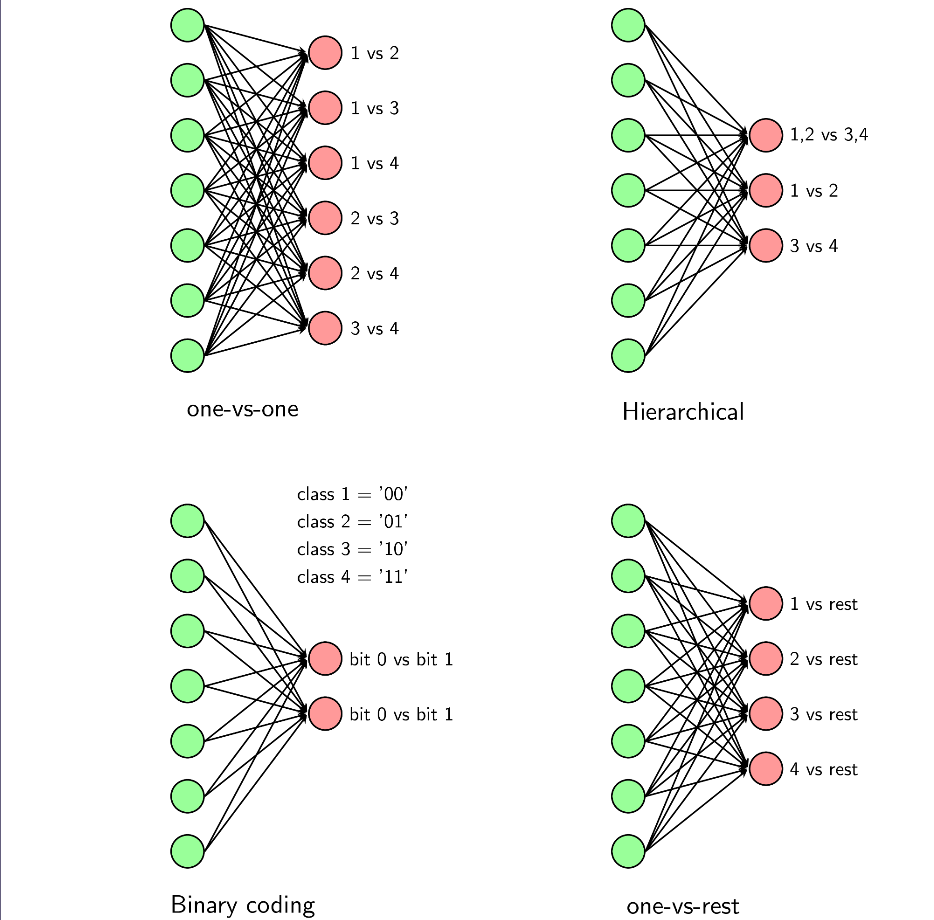

With the above representation, normal type classfier is only work one by one params. But with Neural Network, we can combine all the params to find the best result.

Example with Logistic Regression, on Sigmoid function:

$$w = w + \eta (y_i - z_i) x_i$$

where $z_i = \sigma(w^T x_i)$, $y_i$ is the true label, $x_i$ is the input data, $w$ is the weight vector, $\eta$ is the learning rate.

Can be generalized to Neural Network:

$$W = W + \eta X_i(Y_i - Z_i)^T$$

where $W$ is the weight matrix, $X_i$ is the input matrix, $Y_i$ is the true label matrix, $Z_i$ is the output matrix.